# Random Graph Models

The aim of this notebook is to introduce a few random (undirected) graph models and to explore some of their properties. We'll look at the following models: 

- Bernoulli (Erdos-Renyi)
- Watts-Strogatz (Newman-Moore-Watts)
- Barabasi-Albert
- Stochastic blockmodel
- Configuration 
- Geometric random graphs

## Why random models?

A random graph is a model network in which the values of certain properties are fixed, but the network is in other respects random. (cite Networks, Newman, Ch.11). We use random models to generate families of graphs with similar properties, e.g. degree distribution, cluster coefficient and edge count, i.e. typical properties. For example, we might want to work with graphs that have a specific degree sequence, or lots of hubs (highly connected nodes) or a particular degree distribution. 

In the scenario where we are trying to model social networks, for example, it is likely that we'd want a graph with a few hubs because that's generally a good representation of reality - in social groups there are often a few very sociable people.

In [155]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections
import scipy
from scipy.stats import binom

### Bernoulli Random Graphs

A **Bernoulli graph**, also commonly known as an **Erdos-Renyi graph** is a graph on $n$ vertices where the probability of an edge between any two vertices is $p$. So, the model is parametrised by $(n,p)$. Some properties:
- The expected number of edges is ${n \choose 2}p$, and
- The degree of a randomly chosen vertex has distribution $Bin(n-1,p)$ because every vertex has $n-1$ potential neighbours, each existing with probability $p$.

Let's see a few examples for different $p$-values and then run some trials to see what the degree distribution and number of edges looks like over multiple trials.

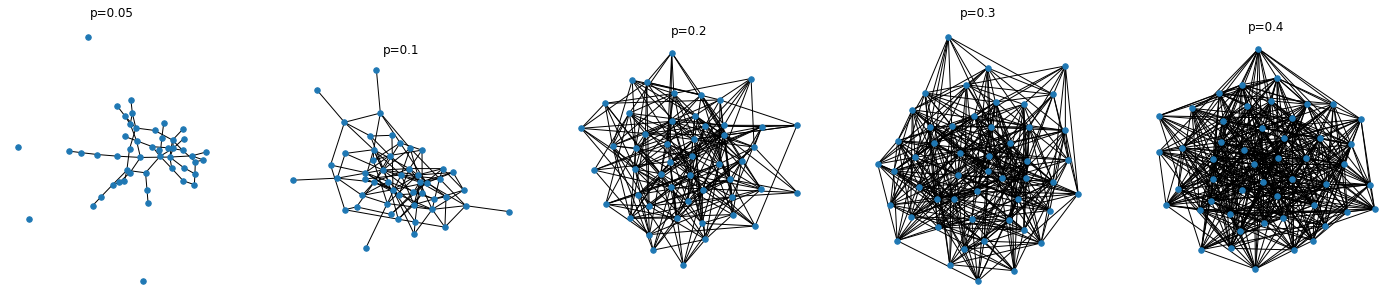

In [152]:
erGraphs = [nx.gnp_random_graph(50,p) for p in [0.05,0.1,0.2,0.3,0.4]]
titles = ['p={}'.format(x) for x in [0.05,0.1,0.2,0.3,0.4]]
fig, axes = plt.subplots(1,5,figsize=(25,5))
for k in range(5):
    ax = plt.subplot(1,5,k+1)
    ax.set_aspect('equal')
    plt.title(titles[k])    
    nx.draw_spring(erGraphs[k], node_size=30) 

Now let's fix $(n,p)=(50,0.2)$ and generate 10000 random graphs to see the degree distribution and actual number of edges. 

The expected number of edges is $245$.

In [58]:
erTrialGraphs = [nx.gnp_random_graph(50,0.2) for x in range(10000)]
numEdges = [G.number_of_edges() for G in erTrialGraphs]
deg = [dict(nx.degree(G,[0]))[0] for G in erTrialGraphs]
deg.sort()

[]

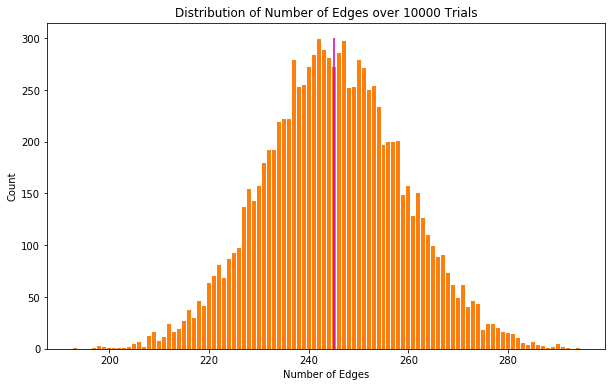

In [63]:
edgeCount = collections.Counter(numEdges)
edgeNum, count = zip(*edgeCount.items())
plt.figure(figsize=(10,6))
plt.bar(edgeNum, count, width=0.80, color="tab:orange")
plt.vlines(245,ymin=0,ymax=300,colors='m')
plt.title("Distribution of Number of Edges over 10000 Trials")
plt.ylabel("Count")
plt.xlabel("Number of Edges")
ax.set_xticks([d + 0.4 for d in edgeNum])
ax.set_xticklabels(edgeNum)

We plot the degree distribution of a single vertex over $10000$ trials and compare it to the binomial distribution $Bin(49,0.2)$.

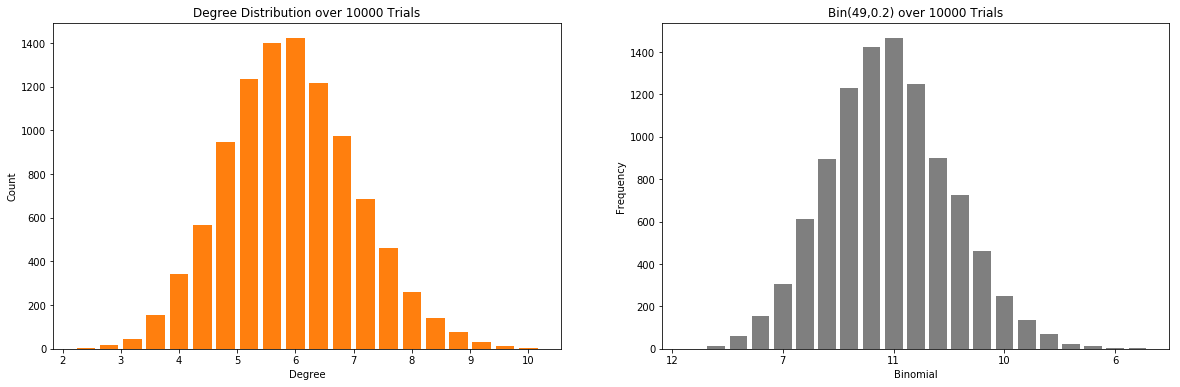

In [69]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
degCount = collections.Counter(deg)
degNum, dCount = zip(*degCount.items())
ax1.bar(degNum, dCount, width=0.80, color="tab:orange")
ax1.set_title("Degree Distribution over 10000 Trials")
ax1.set_ylabel("Count")
ax1.set_xlabel("Degree")
ax1.set_xticklabels(degNum)
data_binom = binom.rvs(n=49,p=0.2,loc=0,size=10000)
binCount = collections.Counter(data_binom)
binNum, freq = zip(*binCount.items())
ax2.bar(binNum, freq, width=0.80, color="tab:gray")
ax2.set_title("Bin(49,0.2) over 10000 Trials")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Binomial")
ax2.set_xticklabels(binNum)
plt.show()

### Small-World Models

The *small world phenomenon* is the phenomenon of short paths and high clustering coefficient. The Watts-Strogatz random model aims to generate graphs with these aforementioned properties. We introduce a couple of variations:

#### Watts-Strogatz
Fix $n$ vertices in a ring lattice and connect each vertex to its $k$ nearest neighbours. Select one vertex and the edge connected to its nearest clockwise neighbour. Rewire this edge with probability $\beta$; rewire by attaching to a new vertex, chosen uniformly at random, avoiding self loops and multiple edges. Repeat for the remaining $n-1$ vertices, moving clockwise around the ring. Then repeat for the second closest clockwise neighbours, up until the $k^{th}$. There are $nk$ edges in this graph and the rewiring doesn't add or remove edges.

#### Newman-Moore-Watts
This is an adaptation of the model above where, instead of rewiring, we introduce random shortcut edges. A random shortcut edge can be introduced only between two vertices that are not already incident to each other, and each shortcut is introduced independently with fixed probability $p$.

#### Comparison
The expected average shortest path is shorter in the Newman-Moore-Watts because a few shortcuts can easily reduce the distance between pairs of nodes. The Watts-Strogatz can produce graphs with a wide range of clustering coefficient and shortest path length but struggles to produce observed (in real-world models) degree distributions.

**Watts-Strogatz graphs for $n=20$, $k=4$ and a range of values for $p$.**

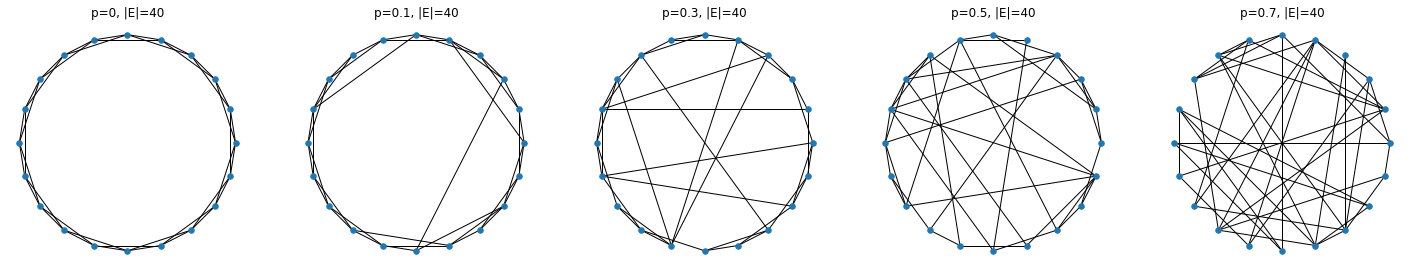

In [89]:
wattsStroGraphs = [nx.watts_strogatz_graph(20,4,p) for p in [0,0.1,0.3,0.5,0.7]]
numEdges = [G.number_of_edges() for G in wattsStroGraphs]
merged_list = tuple(zip([0,0.1,0.3,0.5,0.7],numEdges))
titles = ['p={}, |E|={}'.format(x[0],x[1]) for x in merged_list]
fig, axes = plt.subplots(1,5,figsize=(25,5))
for k in range(5):
    ax = plt.subplot(1,5,k+1)
    ax.set_aspect('equal')
    plt.title(titles[k])    
    nx.draw_circular(wattsStroGraphs[k], node_size=30) 

**Newman-Moore-Watts for the same $n$, $k$ and $p$.**

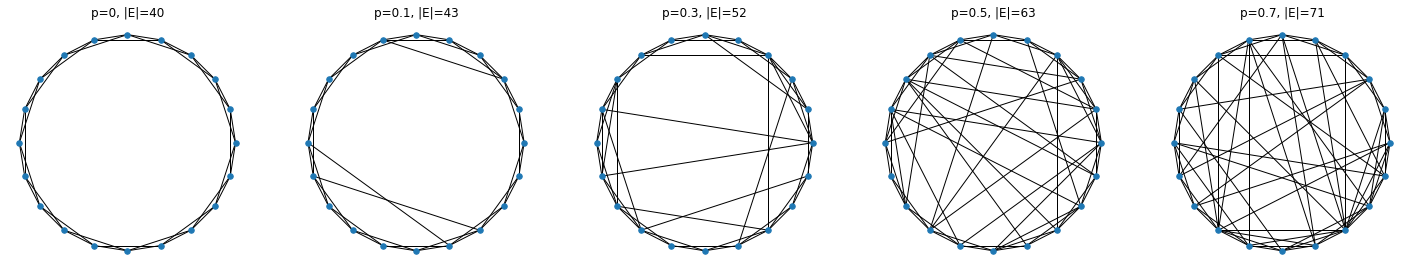

In [90]:
newmanWattsGraphs = [nx.newman_watts_strogatz_graph(20,4,p) for p in [0,0.1,0.3,0.5,0.7]]
numEdges = [G.number_of_edges() for G in newmanWattsGraphs]
merged_list = tuple(zip([0,0.1,0.3,0.5,0.7],numEdges))
titles = ['p={}, |E|={}'.format(x[0],x[1]) for x in merged_list]
fig, axes = plt.subplots(1,5,figsize=(25,5))
for k in range(5):
    ax = plt.subplot(1,5,k+1)
    ax.set_aspect('equal')
    plt.title(titles[k])    
    nx.draw_circular(newmanWattsGraphs[k], node_size=30) 

We can see, as expected, that all of the Watts-Strogatz graphs have the same number of edges, independent of $p$ whereas the Newman-Moore-Watts graphs have an increasing number of edges as $p$ increases.

## Barabasi-Albert Graphs

One feature lacking from the models we've seen so far is that they don't tend to generate hubs - a few nodes with very high degree. The **Barabasi-Albert** or **preferential attachment** random graph model has this property, as well as being **scale-free**. That is, the degree distributions have power law behaviour: $$d_k\sim Ck^{-\gamma},$$ for $k\rightarrow\infty$ and a constant $\gamma$.

The process is as follows:
1. Start at time $1$ with $2$ edges connected by $m$ (parallel) edges.
2. At each $t\geq 2$, add a new vertex with $m$ edges connected to vertices already present in the network.
3. The probability $\pi_i$ that an edge is connected to an already-present vertex $v_i$ depends on the degree $d_i$ of that vertex $$\pi_i = \frac{d(i)}{\sum_jd(j)},$$ where the $j$'s index over vertices already in the network.

We can see why it's called *preferential attachment* because higher-degree vertices are more likely to have new edges attached to them.

Let's look at some examples, where we colour the vertices by their degrees (using the degree centrality from the previous notebook). We can see in the plots below that each graph has a few highly connected vertices.

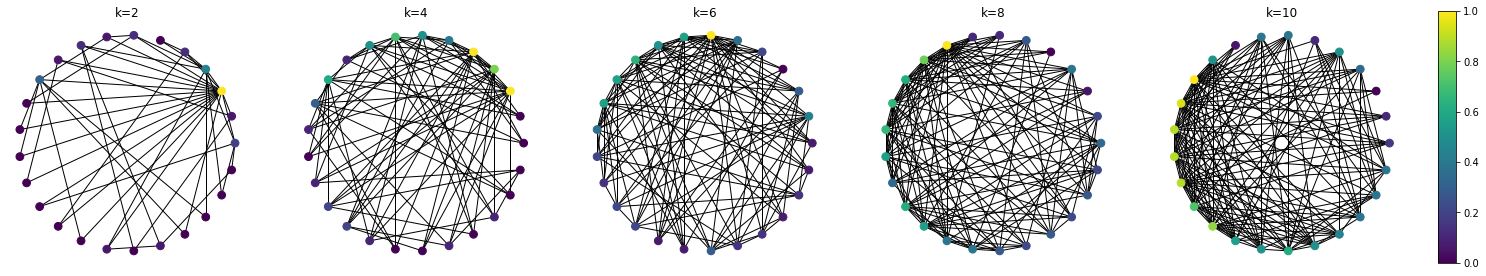

In [113]:
prefAttach = [nx.barabasi_albert_graph(25,k) for k in range(2,11,2)]
g, axes = plt.subplots(1,5,figsize=(25,5))
titles = ['k={}'.format(x) for x in range(2,11,2)]
for k in range(5):
    ax = plt.subplot(1,5,k+1)
    ax.set_aspect('equal')
    plt.title(titles[k])   
    G = prefAttach[k]
    nx.draw_circular(G, node_size = 60, node_color = [nx.degree_centrality(G)[i] for i in G.nodes()])
cbar_ax = g.add_axes([0.92, 0.17, 0.01, 0.7])
sm = plt.cm.ScalarMappable()
sm._A = []
plt.colorbar(sm,cax=cbar_ax)  

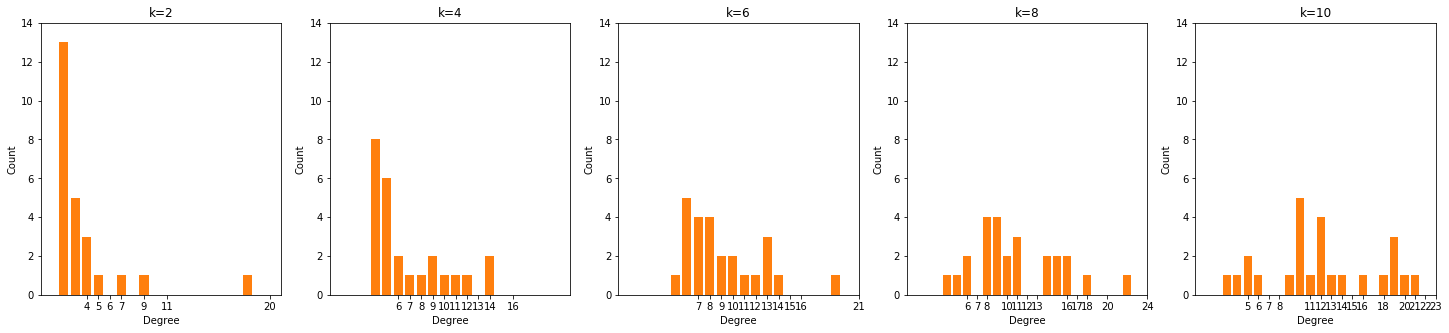

In [119]:
def distribution(sequence):
    itemCount = collections.Counter(sequence)
    x, y = zip(*itemCount.items())
    return x, y
g, axes = plt.subplots(1,5,figsize=(25,5))
titles = ['k={}'.format(x) for x in range(2,11,2)]
for k in range(5):
    ax = plt.subplot(1,5,k+1)
    ax.set_ylim(0, 14)
    ax.set_xlim(0, 21)
    G = prefAttach[k]
    x,y = distribution(sorted([d for n, d in G.degree()], reverse=True))
    ax.set_xticks([d + 2 for d in x])
    plt.bar(x, y, width=0.80, color="tab:orange")
    plt.title(titles[k])  
    plt.ylabel("Count")
    plt.xlabel("Degree")

## Stochastic Block-Model

The **stochastic block model** or **Erdos-Renyi mixture model** is like a generalisation of Erdos-Renyi graphs, where the vertices are labelled by groups and the probability of an edge existing between two vertices depends only on the labels attached to each vertex. These graphs are all simple (no multiple edges or self-loops).

More precisely, $$p_{lm}=\mathbb{P}\left((v_i,v_j)\in E(G) | \text{$v_i$ of type $l$ and $v_j$ of type $m$}\right).$$ 

Let $\alpha_i,...,\alpha_L$ denote the proportion of the vertices of each of the types, so $\sum_l\alpha_l=1$. Then, for a given vertex $v$ picked uniformly at random from $V(G)$, $$\mathbb{E}\left(d(v)\right)=\sum_l\alpha_l\left((|V|\alpha_l-1)p_{l,l}+\sum_{k\neq l}|V|\alpha_kp_{k,l}\right).$$

### A Variation

A variation on this model is to assign (independently at random) the *type* of each vertex, with $$\mathbb{P}(\text{$v$ is of type $l$})=\alpha_l,$$ for $l\in\{1,...,L\}$. Then, the expected degree of a randomly selected vertex $v$ is $$\mathbb{E}\left(d(v)\right)=(|V|-1)\sum_{l-1}^L\sum_{k=1}^L\alpha_l\alpha_kp_{k,l}.$$

### Example

These graphs are useful for modelling and understanding networks with *communities*: distinct groups of nodes where interractions between groups varies. As an example, consider the case where the brain is modelled by a network, with nodes representing neurones and edges representing synapses between them. Each node is of a different biological type, and the probability of a neurone of type $a$ successfully firing to a neurone of type $b$ depends on these types. 

The intra-label probabilities in the example below are relatively high whereas the inter-label probabilities are small. We can see the outcome in the figure, with more edges within groups compared with between groups.

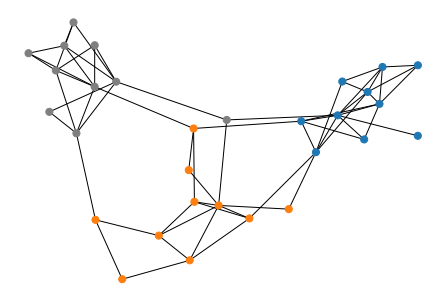

In [137]:
sizes = [10, 10, 10]
probs = [[0.25, 0.05, 0.02], 
         [0.05, 0.35, 0.01], 
         [0.02, 0.01, 0.40]]
colours = ['tab:orange']*10 + ['tab:blue']*10 + ['tab:gray']*10
H = nx.stochastic_block_model(sizes, probs)
nx.draw_spring(H, node_color = [colours[i] for i in H.nodes()], node_size=50)

## Configuration Model

The configuration model gives a graph chosen uniformly among all graphs with a given degree sequence, as long as the degree sequence is possible. Given a feasible degree sequence $(d_1,...,d_n),$ letting $m=\frac{1}{2}\sum_id(i)$,
1. Draw $d(i)$ 'stubs' of edges at each vertex $v_i$.
2. Connect two of the stubs, chosen uniformly at random, with an edge.
3. Repeat for another pair from the remaining $2m-2$ stubs.
4. Continue until all stubs are connected by an edge.

This can create self loops and multiple edges (there is a variant of this model that enforces the resulting configuration to be simple).

The expected number of edges between vertices $v_i$ and $v_j$, for $i\neq j$, is $$\frac{d(i)d(j)}{2m-1}.$$

The benefit of this model is that, of course, you specify the degrees of each vertex so 

Below are a few examples of graphs generated from this model, with vertices coloured by degree. Note that in the plots, you can't see multiple edges (or self-loops) as they are superimposed on top of each other.

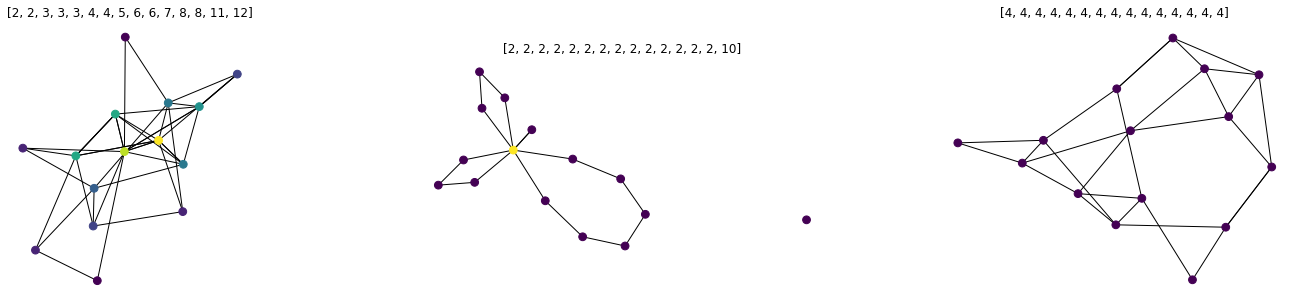

In [154]:
deg_sequences = [[2,2,3,3,3,4,4,5,6,6,7,8,8,11,12],
             [2]*14 + [10],
             [4]*15]
g, axes = plt.subplots(1,3,figsize=(25,5))
for k in range(3):
    ax = plt.subplot(1,3,k+1)
    ax.set_aspect('equal')
    ax.set_title(deg_sequences[k])
    G = nx.configuration_model(deg_sequences[k])
    nx.draw_spring(G, node_size = 60,node_color = [nx.degree_centrality(G)[i] for i in G.nodes()])

## Random Geometric Graphs

*This is the first model we've seen that's dependent on some geometry.*

Choose $n$ points $X_1,...,X_n$ independently at random in $\mathbb{R}^m$, equipped with some distance (usually Euclidean) $d$. Set a threshold value $r$ and connect two vertices by an edge if the distance between them is below this threshold. (More generally, points are chosen independently at random according to some density function. In the Networkx implementation, points live in $[0,1)^m$.)

This model generates graphs with community structure. The graph in the *2_centrality_measures* notebook was an example of a random geometric graph.

## Conclusion

When modelling a real-world network, the choice of model will depend on what properties the network has and what the distribution of summary statistics is for that model. However, often the summary statistics are not indepdendent - for example, the local clustering coefficient, because the existence of a triangle at vertex $v_i$ is not necessarily independent of the existence of a triangle at vertex $v_j$. *Warning: the usual central limit theorems do not apply.*